In [32]:
import numpy as np;
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("train.csv")
df.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_ID             39499 non-null  object 
 1   Property_Type           39499 non-null  object 
 2   Property_Area           39499 non-null  int64  
 3   Number_of_Windows       37845 non-null  float64
 4   Number_of_Doors         39499 non-null  int64  
 5   Furnishing              38457 non-null  object 
 6   Frequency_of_Powercuts  38116 non-null  float64
 7   Power_Backup            39499 non-null  object 
 8   Water_Supply            39499 non-null  object 
 9   Traffic_Density_Score   39499 non-null  float64
 10  Crime_Rate              38712 non-null  object 
 11  Dust_and_Noise          38280 non-null  object 
 12  Air_Quality_Index       39499 non-null  float64
 13  Neighborhood_Review     39499 non-null  float64
 14  Habitability_score      39499 non-null

In [35]:
df.isnull().sum()

Property_ID                  0
Property_Type                0
Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Furnishing                1042
Frequency_of_Powercuts    1383
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 787
Dust_and_Noise            1219
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

In [36]:
df.shape

(39499, 15)

In [37]:
df.drop(['Number_of_Windows'],axis=1,inplace=True);

In [38]:
df.shape

(39499, 14)

<AxesSubplot:>

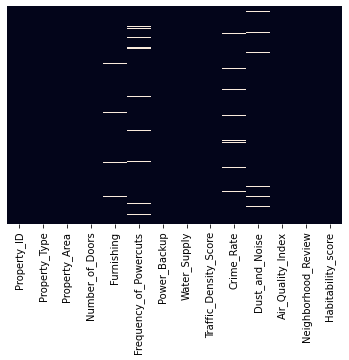

In [39]:
#heatmap
sns.heatmap(df.isnull(), yticklabels=False,cbar=False)

In [40]:
#average out other values
df['Dust_and_Noise'] = df['Dust_and_Noise'].fillna(df['Dust_and_Noise'].mode()[0])

In [41]:
#furishing

df['Furnishing'].value_counts()


Semi_Furnished     20357
Unfurnished        10344
Fully Furnished     7756
Name: Furnishing, dtype: int64

In [42]:
# the max value is semi furnished, so replace the values 
df['Furnishing'] = df['Furnishing'].fillna(df['Furnishing'].mode()[0])

#
df['Frequency_of_Powercuts'] = df['Frequency_of_Powercuts'].fillna(df['Frequency_of_Powercuts'].mean())

<AxesSubplot:>

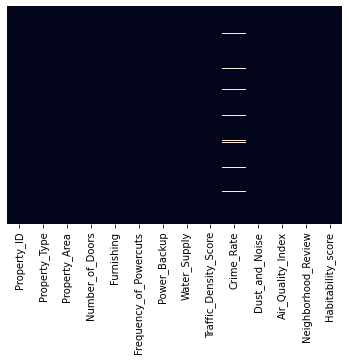

In [43]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False)

In [44]:
df['Crime_Rate'].value_counts()

Well below average        19472
Slightly below average    11580
Slightly above average     5303
Well above average         2357
Name: Crime_Rate, dtype: int64

In [45]:
df['Crime_Rate'] = df['Crime_Rate'].fillna(df['Crime_Rate'].mode()[0])

<AxesSubplot:>

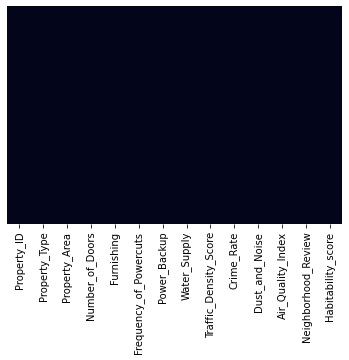

In [46]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False)